# 物理シミュレーション

このノートブックでは、Jupyter Notebook において、物理シミュレーションを行い、グラフに描写することを目的としている。<br/>
この物理シミュレーションを再現するため、次のように必要なライブラリ群をインポートする

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## モンキーハンティング

では、このモンキーハンティングについてシミュレーションしていきます。

>木の枝にぶら下がっている猿に狙いを定めて銃を撃つと、その音に驚いて手を離して落下した猿に必ず当たります。<br/>銃の弾は一直線に飛ぶわけではなく、重力によって少し下降します。それなのに必ず猿に命中するのです。このことをモンキーハンティングといいます。<br/>
もちろん条件がありまして、空気抵抗が無いことと、銃を撃つのと猿が手を放すのが同時（つまり音速は無限大＊で、驚いてから手を放すまでのタイムラグも無い）ということです。

In [48]:
# definition of the constant (gravity, length) 

G = 9.8 
L = 10

theta = np.pi/4
v0 = 10
interval = 10
t = np.arange(0,L/v0,interval/1000)
y0 = [[0,v0*np.sin(theta)],[L*np.sin(theta),0]]

## Caluculation 

$$
m\frac{d^2y}{dt^2}= -mg
$$

$$
\therefore \frac{d^2y}{dt^2}= -g 
$$ 

以上から、次のように表せます。

$$ 
\frac{dy}{dt} = v \\\
\frac{dv}{dt} = -g
$$

以上の公式をもとに、1つの式で表すと、

$$
{\frac{d}{dt} \left(\begin{array}{c}y \\ v\end{array}\right) = \left(\begin{array}{rr}0 & 1 \\ 0 & 0\end{array}\right)\left(\begin{array}{c}y \\ v\end{array}\right) + \left(\begin{array}{c}0 \\ -g\end{array}\right)}
$$

となります。

In [49]:
def equation(y,t,g):
    return [y[1],-1*G]

### odeint 

ODE=Ordinary Differential Equation (常微分方程式)

公式リファレンス：https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

In [50]:
y1 = odeint(equation, y0[0],t,args = (G,))
y2 = odeint(equation, y0[1],t,args = (G,))

In [57]:
#[弾丸の位置  弾丸の鉛直方向の速度]
y1.T

array([[ 0.        ,  0.07022068,  0.13946136,  0.20772203,  0.27500271,
         0.34130339,  0.40662407,  0.47096475,  0.53432542,  0.5967061 ,
         0.65810678,  0.71852746,  0.77796814,  0.83642882,  0.89390949,
         0.95041017,  1.00593085,  1.06047153,  1.11403221,  1.16661288,
         1.21821356,  1.26883424,  1.31847492,  1.3671356 ,  1.41481627,
         1.46151695,  1.50723763,  1.55197831,  1.59573899,  1.63851967,
         1.68032034,  1.72114102,  1.7609817 ,  1.79984238,  1.83772306,
         1.87462373,  1.91054441,  1.94548509,  1.97944577,  2.01242645,
         2.04442712,  2.0754478 ,  2.10548848,  2.13454916,  2.16262984,
         2.18973052,  2.21585119,  2.24099187,  2.26515255,  2.28833323,
         2.31053391,  2.33175458,  2.35199526,  2.37125594,  2.38953662,
         2.4068373 ,  2.42315797,  2.43849865,  2.45285933,  2.46624001,
         2.47864069,  2.49006137,  2.50050204,  2.50996272,  2.5184434 ,
         2.52594408,  2.53246476,  2.53800543,  2.5

In [58]:
#[お猿さんの位置  お猿さんの鉛直方向の速度]
y2.T

array([[ 7.07106781,  7.07057781,  7.06910781,  7.06665781,  7.06322781,
         7.05881781,  7.05342781,  7.04705781,  7.03970781,  7.03137781,
         7.02206781,  7.01177781,  7.00050781,  6.98825781,  6.97502781,
         6.96081781,  6.94562781,  6.92945781,  6.91230781,  6.89417781,
         6.87506781,  6.85497781,  6.83390781,  6.81185781,  6.78882781,
         6.76481781,  6.73982781,  6.71385781,  6.68690781,  6.65897781,
         6.63006781,  6.60017781,  6.56930781,  6.53745781,  6.50462781,
         6.47081781,  6.43602781,  6.40025781,  6.36350781,  6.32577781,
         6.28706781,  6.24737781,  6.20670781,  6.16505781,  6.12242781,
         6.07881781,  6.03422781,  5.98865781,  5.94210781,  5.89457781,
         5.84606781,  5.79657781,  5.74610781,  5.69465781,  5.64222781,
         5.58881781,  5.53442781,  5.47905781,  5.42270781,  5.36537781,
         5.30706781,  5.24777781,  5.18750781,  5.12625781,  5.06402781,
         5.00081781,  4.93662781,  4.87145781,  4.8

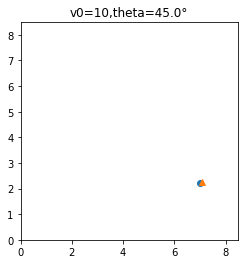

In [61]:
# ここで、計算をもとにしてグラフがプロットされる。
# Jupyter Lab では、IPython の HTML を使わないとアニメーションが生成、起動することができない。

fig,ax = plt.subplots()
obj1, = ax.plot([],[],'o')
obj2, = ax.plot([],[],'^')
ax.set_xlim(0,L*np.cos(theta)*1.2)
ax.set_ylim(min(y1.T[0])*1.2,L*np.sin(theta)*1.2)
ax.set_aspect('equal')
ax.set_title('v0={},theta={}°'.format(v0,theta*180/np.pi))

def update_anim(frame_num):
    obj1.set_data(v0*np.cos(theta)*t[frame_num],y1.T[0][frame_num]) #(水平方向の速度×経過時間, 鉛直方向の位置)
    obj2.set_data(L*np.cos(theta),y2.T[0][frame_num])
    return obj1, obj2,

ani = FuncAnimation(fig,update_anim,frames=np.arange(0,len(t)),interval=interval,blit=True,repeat=True)

HTML(ani.to_jshtml())